# Week 9 Homework

#### While the Belize dataset is not normally distributed, act as if it is for the purposes of the homework. 

#### Imports for Start-Up

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson
from scipy.stats import binom

### 1. Why is assuming normal data an important consideration when answering questions about probability?

The normal distribution is very simple by nature.  It relies on only the mean and the standard deviation.  Because mean, median, and mode are all equal to one another in a normal distribution, data scientists are better able to make predictions about data when using it.  It's worth noting that when most of the variables in nature are examined with a very large sample size, they more closely mimic the normal distribution.

### 2.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

### a. How do you choose your bin size?

At first, I started with 100 bins, then changed the bin size multiple times to determine which of the bin numbers gave the 'best' representation of the data (in my opinion).  I thought 50 or so would be good.  Then I did some research, and I discovered the Freedman-Diaconis rule.  This rule says that you can determine the best width of the bins by taking twice the interquartile range of the dataset divided by the cube root of the sample size.  I found several rules that are used to determine bin size, but from what I saw, Freedman-Diaconis does the best job of taking into account the spread of the data.  I have attached my code below, but I used Freedman-Diaconis to determine the appropriate bin width, then divided the range of the data by the bin width to find the number of bins.  In the end, I used 71 bins.

In [40]:
revmo_q1 = belize_df['reviews_per_month'].quantile(0.25)
revmo_q3 = belize_df['reviews_per_month'].quantile(0.75)
revmo_iqr = revmo_q3 - revmo_q1
revmo_bin_width = (2 * revmo_iqr) / (len(belize_df['reviews_per_month']) ** (1 / 3))
revmo_bin_count = int(np.ceil((belize_df['reviews_per_month'].max() - belize_df['reviews_per_month'].min()) / revmo_bin_width))
print(revmo_bin_count)

numrev_q1 = belize_df['reviews_per_month'].quantile(0.25)
numrev_q3 = belize_df['reviews_per_month'].quantile(0.75)
numrev_iqr = numrev_q3 - numrev_q1
numrev_bin_width = (2 * numrev_iqr) / (len(belize_df['reviews_per_month']) ** (1 / 3))
numrev_bin_count = int(np.ceil((belize_df['reviews_per_month'].max() - belize_df['reviews_per_month'].min()) / numrev_bin_width))
print(numrev_bin_count)

71
71


### b. Histograms

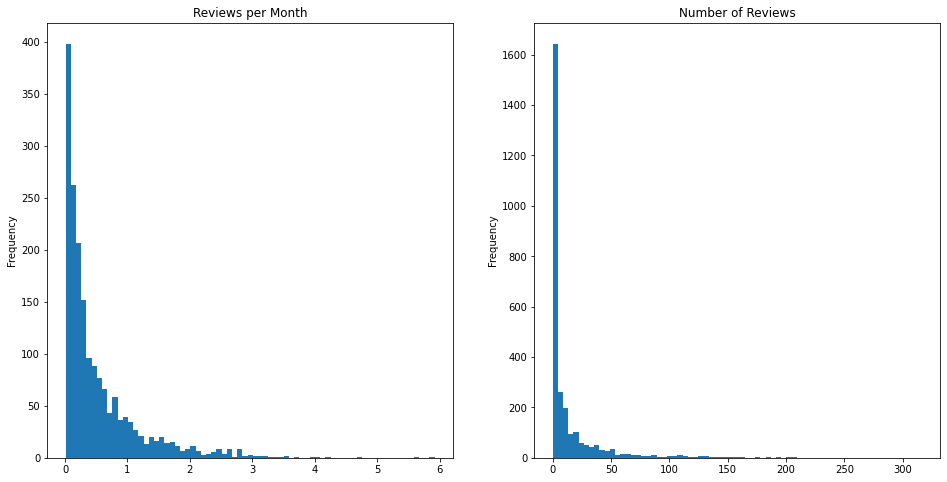

In [44]:
belize=pd.read_csv('belize_airbnb_listings.csv')
belize_df=pd.DataFrame(belize)

fig, ax = plt.subplots(nrows=1, ncols=2)
belize_df['reviews_per_month'].plot.hist(bins=71, figsize=(16,8),ax=ax[0])
ax[0].set_title('Reviews per Month')
   
belize_df['number_of_reviews'].plot.hist(bins=71, figsize=(16,8), ax=ax[1])
ax[1].set_title('Number of Reviews')

plt.show()

### 3.  Create a box and whisker plot for availability_365. 

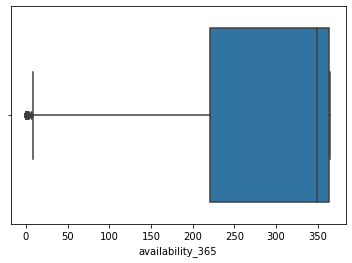

In [52]:
sns.boxplot(x = belize_df['availability_365'])
plt.show()

### What does this show you?

This data is definitely left-skewed.  It appears that the upper of the half of the data points lie between 350 and 375, whereas the lower half stretches from about five to 350.

### 4.  What is the probability that the price for an Airbnb is under $50?

1.3623364124386372e-92

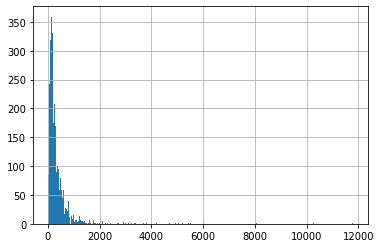

In [75]:
#Use Freedman-Diaconis to determine best number of bins....320!!!!
price_q1 = belize_df['price'].quantile(0.25)
price_q3 = belize_df['price'].quantile(0.75)
price_iqr = price_q3 - price_q1
price_bin_width = (2 * price_iqr) / (len(belize_df['price']) ** (1 / 3))
price_bin_count = int(np.ceil((belize_df['price'].max() - belize_df['price'].min()) / price_bin_width))

#Create histogram for reference
belize_df['price'].hist(bins=price_bin_count)

#Calculate mean for poisson distribution
avg_price=belize_df['price'].mean()

poisson.cdf(50,avg_price)


The probability that the price is under $50 is practically 0.

### a.	What do you notice about these records? Hint: look at the other columns.

The columns for price, minimum nights, number of reviews, reviews per onth, and calculated host listings count are all substantially right skewed.  The only column that differs from the other is availability 365, which is left skewed.

### b.	What distribution does this data most closely fit?

This data most closely fits a Poisson distribution.

### 5.	Calculate the sample variance and standard deviation for all the numerical columns in the same output.

In [101]:
dict={'Sample Variance':belize_df.var(ddof=1,numeric_only=True),
     'Standard Deviation':belize_df.std(ddof=1,numeric_only=True)}

belize_stats = pd.concat(dict,
                        axis = 1)

pd.DataFrame(belize_stats)


,Sample Variance,Standard Deviation
id,1.661428e+14,1.288964e+07
host_id,1.036327e+16,1.018001e+08
latitude,2.888413e-01,5.374396e-01
longitude,1.473608e-01,3.838760e-01
price,3.171096e+05,5.631248e+02
minimum_nights,3.214712e+01,5.669843e+00
number_of_reviews,9.197735e+02,3.032777e+01
reviews_per_month,4.384482e-01,6.621542e-01
calculated_host_listings_count,2.674046e+03,5.171118e+01
availability_365,1.454861e+04,1.206176e+02


### a.	Why sample variance and not population variance?

The belize_airbnb_listings dataset only represents a sample of the population, not the entire population.  So we should only use sample variance when making calculations.

### b.	What is your takeaway for each metric?

Because of the scales of measurement for the first four rows, their variance and standard deviation values are not meaningful.  But when considering the standard deviation for all of the other rows, the value is very large in each case relative to what is being measured.  The variance is also high for each of the lower six rows of the dataframe.  Given that this metric is the square of each distance from the mean, it gives a good picture of just how varied each column of the dataset truly is.  Given the earlier observation that all of the columns are notably skewed, the fact that the standard deviation and variance are both high is not surprising.

### c.	What are the scales of measurement for each of these values? 

ID and host_id are nominal. Latitude and longitude are interval.
Price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, and availability_365 are ratio.

### 6.	What percent of Airbnb listings in Belize are available 360 days a year or more?

In [132]:
#belize_df[belize_df['availability_365'] >= 360].count()

round(((np.sum(belize_df['availability_365'] >= 360))*100)/(belize_df['availability_365'].count()),2)

39.52

### a.	360 days or less?

In [133]:
round(((np.sum(belize_df['availability_365'] <= 360))*100)/(belize_df['availability_365'].count()),2)

61.55

### b.	What distribution does this data most closely fit?

This data most closely fits a binomial distribution.

### 7.	What minimum night count are 75% of Airnbnb listing in Belize greater than?

In [144]:
np.quantile(belize_df['minimum_nights'], .25)

1.0

## The Monty Hall Problem

The Monty Hall Problem is named after the host of the game show "Let's Make a Deal." In the show, a member of the audience is asked to choose one of three doors, one of which contains a desirable prize and two which contain disappointments.  Once the player's choice is made, show personnel open one of the two remaining doors to reveal the undesirable 'prize.'  After that, the audience member has the option to stay with their originally chosen door or to switch and choose the remaining door instead. 

 In terms of probabilities, the player has a 33% chance of selecting the 'winning' door on their first choice, but a 67% chance of selecting the winning door by switching their choice to the remaining door.  This is true because both of the two 'losing' doors, when chosen first, will inevitably leave the 'winning' door as the only remaining door (the door selected by switching).  So the player of this game has a better chance of winning if they always switch their chosen door when offered the opportunity.


## DataCamp

![Intro to Stats in Python.png](https://github.com/jmort16/wk_09_hmwk/blob/main/Intro%20to%20Stats%20in%20Python.png)